# Principal Component Analysis

- Principal Component Analysis (PCA, for short) is a decomposition technique that allows one to break multivariate data into a less dimensional dataset, capturing the majority of a dataset's information within a minimal number of features

- PCA does that by transforming youy highly dimensional data into a set of ortogonal components, called Principal Components

- PCA works by successively identifying the axis of greatest variance by identifying the center point of the dataset, calculating the covariance matrix, the eigenvectors of the covariance matrix, orthonomalizing the eigenvectors, and calculating the proportion of variance represented by each eigenvector

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.cm as cm

### Loading the digits dataset

In [13]:
digits = load_digits()
data = digits.data
data[:1]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

### Calculating number of samples, features and targets/labels

In [16]:
n_samples, n_features = data.shape
labels = digits.target
n_targets = len(np.unique(digits.target))
n_targets

10

### Reducing dimensionality to n_targets (10) features, via PCA

In [17]:
pca = PCA(n_components=n_targets)
data_pca = pca.fit(data).transform(data)
data_pca[:2]

array([[ -1.25946923,  21.27488772,  -9.46305145,  13.01415075,
         -7.1288013 ,  -7.43975769,   3.25401802,   2.55111916,
         -0.58072213,   3.62269339],
       [  7.95760956, -20.76869663,   4.43950636, -14.89372349,
          5.89620063,  -6.48574207,   2.12821471,  -4.61617337,
          3.58805356,  -1.07696669]])

In [18]:
print('Explained variance ration : ' + str(pca.explained_variance_ratio_))

Explained variance ration : [ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315982  0.03661368  0.03353246  0.03078785]


In [19]:
print('Total explained variance : ' + str(sum(pca.explained_variance_ratio_)))

Total explained variance : 0.738226429053


### Plotting data, with labels, in first 2 Principal Components :
- As you can see, there are some separation between classes, even when analysing only by the first two principal components

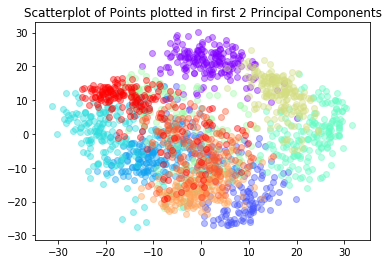

In [31]:
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, x, labels):
    plt.scatter(data_pca[labels==i, 0], data_pca[labels==i, 1], c=c, alpha=0.4)

plt.legend()
plt.title('Scatterplot of Points plotted in first 2 Principal Components')
plt.show()